In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import boxcox

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.metrics import root_mean_squared_error

In [65]:
df = pd.read_csv("/content/drive/MyDrive/Session_Datasets/household_power_consumption.txt",sep=";")

In [66]:
df.dtypes

,0
Date,object
Time,object
Global_active_power,object
Global_reactive_power,object
Voltage,object
Global_intensity,object
Sub_metering_1,object
Sub_metering_2,object
Sub_metering_3,float64


In [67]:
df.replace("?",pd.NA,inplace=True)

In [68]:
df[df.isnull().any(axis=1)]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
6840,21/12/2006,11:24:00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
19724,30/12/2006,10:08:00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
19725,30/12/2006,10:09:00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
41832,14/1/2007,18:36:00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
...,...,...,...,...,...,...,...,...,...
1745254,11/4/2010,16:58:00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
1791581,13/5/2010,21:05:00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
1834571,12/6/2010,17:35:00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
1859009,29/6/2010,16:53:00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN


In [69]:
df.isna().sum()

,0
Date,0
Time,0
Global_active_power,13514
Global_reactive_power,13514
Voltage,13514
Global_intensity,13514
Sub_metering_1,13514
Sub_metering_2,13515
Sub_metering_3,13515


In [70]:
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # converts to float, handles missing
    df[col].fillna(df[col].median(), inplace=True) # Imputation

/tmp/ipython-input-70-2220546796.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True) # Imputation


In [71]:
# Combining Date and time
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format="%d/%m/%Y %H:%M:%S")
df.set_index('Datetime', inplace=True)

In [72]:
df.drop(['Date', 'Time'], axis=1, inplace=True)

In [73]:
# Getting few columns from DateTime Columns

df['hour'] = df.index.hour
df['day'] = df.index.day
df['weekday'] = df.index.weekday
df['month'] = df.index.month


In [74]:
df.reset_index(inplace=True)

## Checking Distribution

In [75]:
# for i in df.columns:
#     plt.figure(figsize=(16,6))
#     sns.kdeplot(df[i], shade=True)
#     plt.title(i)
#     plt.show()

In [76]:
# Outlier treatment
for col in numeric_cols:
    df[col + '_log'] = np.log1p(df[col])

In [77]:
log_columns=["Global_active_power_log","Global_reactive_power_log","Voltage_log","Global_intensity_log","Sub_metering_1_log","Sub_metering_2_log","Sub_metering_3_log"]

In [78]:
# for i in log_columns:
#     plt.figure(figsize=(16,6))
#     sns.kdeplot(df[i], shade=True)
#     plt.title(i)
#     plt.show()

In [79]:
df.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day,weekday,month,Global_active_power_log,Global_reactive_power_log,Voltage_log,Global_intensity_log,Sub_metering_1_log,Sub_metering_2_log,Sub_metering_3_log
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,17,16,5,12,1.651731,0.349247,5.463154,2.965273,0.0,0.693147,2.890372
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,17,16,5,12,1.850028,0.361861,5.458010,3.178054,0.0,0.693147,2.833213
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,17,16,5,12,1.852227,0.404131,5.456560,3.178054,0.0,1.098612,2.890372
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,17,16,5,12,1.854421,0.406798,5.458479,3.178054,0.0,0.693147,2.890372
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,17,16,5,12,1.540302,0.423960,5.466709,2.821379,0.0,0.693147,2.890372


## Model Building

In [80]:
# Feature Selection

val = df[[
    'Global_reactive_power', 'Voltage', 'Global_intensity',
    'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3',
    'hour', 'day', 'weekday', 'month'
]]


tar=df['Global_active_power_log']

trdata,tsdata,trlab,tslab = train_test_split(val,tar,test_size=0.20,random_state=77)


## model 1

In [81]:
# rf_model = RandomForestRegressor(n_estimators=50,random_state=77)

In [82]:
# rf_model.fit(trdata,trlab)

In [83]:
# Training Performance
# tr_pred=rf_model.predict(trdata)

In [84]:
# mean_squared_error(trlab,tr_pred)

In [85]:
# rmse = np.sqrt(mean_squared_error(trlab, tr_pred))

In [86]:
# rmse

In [87]:
# Testing Performance
# ts_pred=rf_model.predict(tsdata)

In [88]:
# mean_squared_error(tslab,ts_pred)

In [89]:
# rmse=np.sqrt(mean_squared_error(tslab,ts_pred))
# rmse

## model 3

In [90]:
# rf_model = RandomForestRegressor(n_estimators=50,random_state=77,max_depth=4)

In [91]:
# rf_model.fit(trdata,trlab)

In [92]:
# tr_pred=rf_model.predict(trdata)

In [93]:
# ts_pred=rf_model.predict(tsdata)

MSE

In [94]:
# #Training MSE
# mean_squared_error(trlab,tr_pred)

In [95]:
# #Testing MSE
# mean_squared_error(tslab,ts_pred)

RMSE

In [96]:
# from sklearn.metrics import root_mean_squared_error

In [97]:
# # training RMSE
# root_mean_squared_error(trlab,tr_pred)

In [98]:
# #testing RMSE
# root_mean_squared_error(tslab,ts_pred)

Grid Seach Params

In [99]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [50],
#     'max_depth': [3, 4, 5, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# grid = GridSearchCV(
#     estimator=RandomForestRegressor(random_state=77),
#     param_grid=param_grid,
#     cv=3,
#     scoring='neg_mean_squared_error',
#     n_jobs=-1
# )

# grid.fit(trdata, trlab)
# print("Best parameters:", grid.best_params_)


In [100]:
# # Predicting on test data
# predictions = rf_model.predict(tsdata)

# # View actual vs predicted
# comparison_df = pd.DataFrame({
#     'Actual': tslab,
#     'Predicted': predictions
# })

# comparison_df.head(10)


Actual vs Predicted Plot

In [101]:
# plt.figure(figsize=(14,5))
# plt.plot(tslab.values[:100], label='Actual', marker='o')
# plt.plot(ts_pred[:100], label='Predicted', marker='x')
# plt.title("Actual vs Predicted Energy Consumption")
# plt.xlabel("Sample Index")
# plt.ylabel("Global Active Power")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# XGBoost

In [102]:
import xgboost as xgb
from xgboost import XGBRegressor

In [103]:
xgb_model = XGBRegressor(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    random_state=77
)

xgb_model.fit(trdata, trlab)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=77, ...)

In [104]:
# Training Prediction
tr_pred= xgb_model.predict(trdata)

In [105]:
# Testing Prediction
ts_pred = xgb_model.predict(tsdata)

In [106]:
#Training MSE
mean_squared_error(trlab,tr_pred)

0.00023038755086257878

In [107]:
#Testing MSE
mean_squared_error(tslab,ts_pred)

0.0002347942142836623

RMSE

In [108]:
# training RMSE
root_mean_squared_error(trlab,tr_pred)

0.015178522683798275

In [109]:
#testing RMSE
root_mean_squared_error(tslab,ts_pred)

0.01532299625672676

In [110]:
# View actual vs predicted
comparison_df = pd.DataFrame({
    'Actual': tslab,
    'Predicted': ts_pred
})

comparison_df.head(10)


,Actual,Predicted
421263,0.298622,0.279217
658353,0.356275,0.351083
1303584,0.336472,0.318913
1071083,0.329304,0.338201
1373350,0.838113,0.841712
433718,1.542871,1.539558
1591281,1.273126,1.268412
1367716,0.185649,0.175267
1354759,1.444563,1.446872
561448,0.915490,0.920694


Actual vs Predicted Plot XGBoost

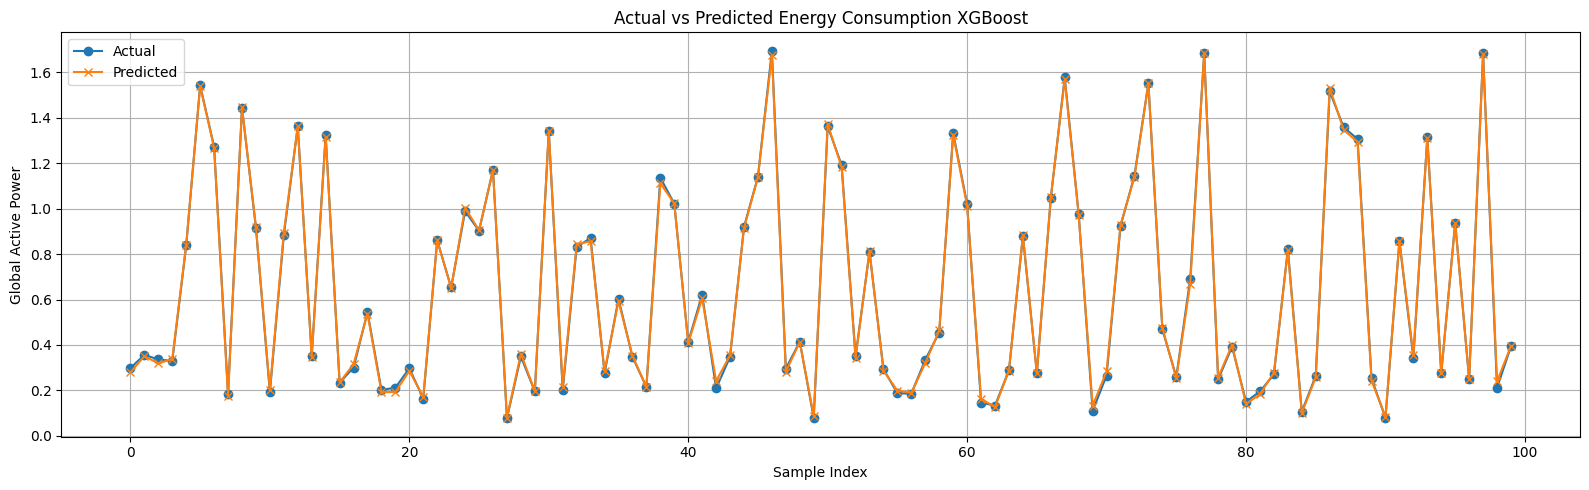

In [111]:
plt.figure(figsize=(16,5))
plt.plot(tslab.values[:100], label='Actual', marker='o')
plt.plot(ts_pred[:100], label='Predicted', marker='x')
plt.title("Actual vs Predicted Energy Consumption XGBoost")
plt.xlabel("Sample Index")
plt.ylabel("Global Active Power")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [112]:
# Error is less than 0.02

Saving the model in pickle format

In [113]:
import pickle

with open('xgb_energy_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)
